In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
df = pd.read_csv("dataset.csv")
df.head(5)

,dt,temp,feels_like,pressure,humidity,temp_min,temp_max,wind_speed,wind_deg,clouds_all,weather_main,weather_description,latitude,longitude,visibility,dew_point,uv_index,temp_Celsius,day_of_week
0,1672531200,291.642630,303.634593,991,13.0,266.955102,287.229503,9.803036,128,66,Thunderstorm,few clouds,78.780178,-1.732498,7291,286.435469,0.586973,18.492630,Sunday
1,1672534800,298.110529,308.576461,1022,66.0,257.179161,290.785585,200.000000,165,24,Drizzle,clear sky,7.808529,62.192429,233,239.293774,6.287994,24.960529,Sunday
2,1672538400,306.901877,286.877866,984,53.0,263.838302,293.482808,14.681301,306,7,Drizzle,light drizzle,-40.820393,-117.277940,7270,234.787210,8.619931,33.751877,Sunday
3,1672542000,312.883459,260.983233,998,15.0,260.275475,314.995047,8.068081,228,15,Clouds,clear sky,-80.628369,161.755954,6953,243.060115,8.731829,39.733459,Sunday
4,1672545600,304.110333,257.896054,991,65.0,245.725847,329.935558,1.946211,151,1,Drizzle,light drizzle,-7.494312,-60.130403,6825,281.684305,2.691817,30.960333,Sunday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   dt                   500 non-null    int64  
 1   temp                 500 non-null    float64
 2   feels_like           500 non-null    float64
 3   pressure             500 non-null    int64  
 4   humidity             500 non-null    float64
 5   temp_min             500 non-null    float64
 6   temp_max             500 non-null    float64
 7   wind_speed           500 non-null    float64
 8   wind_deg             500 non-null    int64  
 9   clouds_all           500 non-null    int64  
 10  weather_main         500 non-null    object 
 11  weather_description  485 non-null    object 
 12  latitude             500 non-null    float64
 13  longitude            500 non-null    float64
 14  visibility           500 non-null    int64  
 15  dew_point            500 non-null    flo

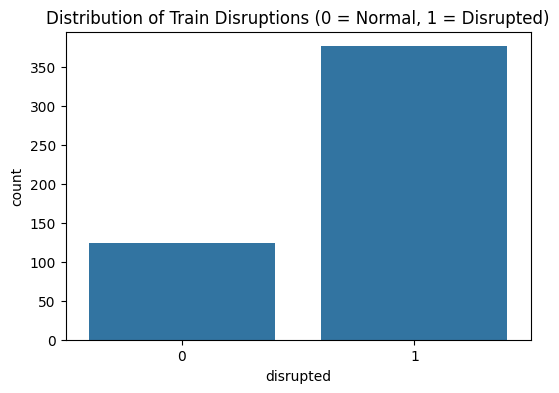

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Train Disruptions (0 = Normal, 1 = Disrupted)")
plt.show()


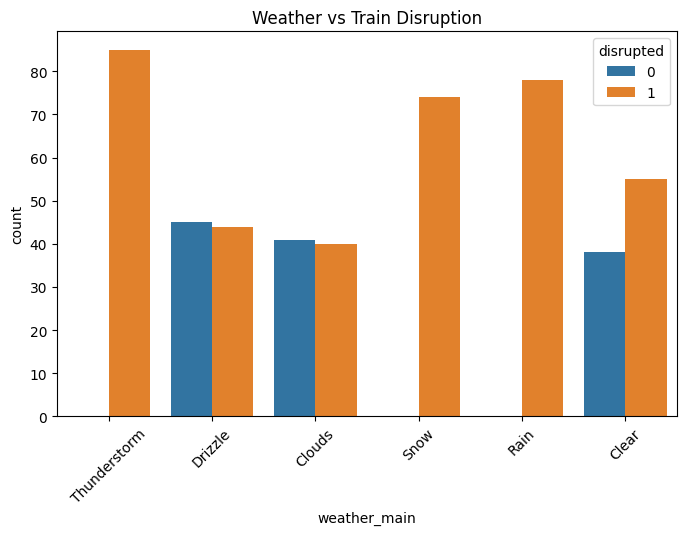

In [60]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["weather_main"], hue=df["disrupted"])
plt.xticks(rotation=45)
plt.title("Weather vs Train Disruption")
plt.show()


In [11]:
#handling missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:  # numeric column
        df[col] = df[col].fillna(df[col].mean())
    else:  # categorical column
        df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#one hot encoding-> turn categories into binary columns
categorical_cols = ["weather_main", "weather_description", "day_of_week"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [13]:
#reset index
df_encoded = df_encoded.reset_index(drop=True)

In [15]:
print("Original shape:", df.shape)
print("After encoding:", df_encoded.shape)
print(df_encoded.head(5))

Original shape: (500, 19)
After encoding: (500, 34)
           dt        temp  feels_like  pressure  humidity    temp_min  \
0  1672531200  291.642630  303.634593       991      13.0  266.955102   
1  1672534800  298.110529  308.576461      1022      66.0  257.179161   
2  1672538400  306.901877  286.877866       984      53.0  263.838302   
3  1672542000  312.883459  260.983233       998      15.0  260.275475   
4  1672545600  304.110333  257.896054       991      65.0  245.725847   

     temp_max  wind_speed  wind_deg  clouds_all  ...  \
0  287.229503    9.803036       128          66  ...   
1  290.785585   22.643187       165          24  ...   
2  293.482808   14.681301       306           7  ...   
3  314.995047    8.068081       228          15  ...   
4  329.935558    1.946211       151           1  ...   

   weather_description_snowfall  weather_description_thunderstorm  \
0                         False                             False   
1                         False   

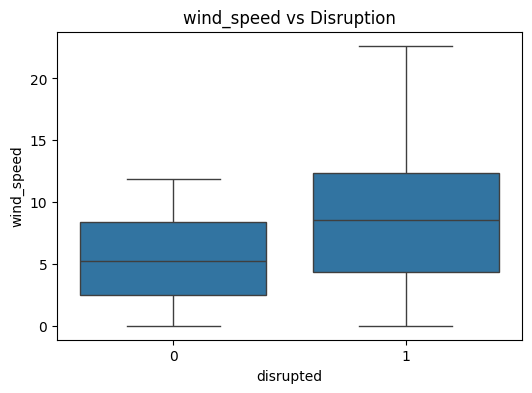

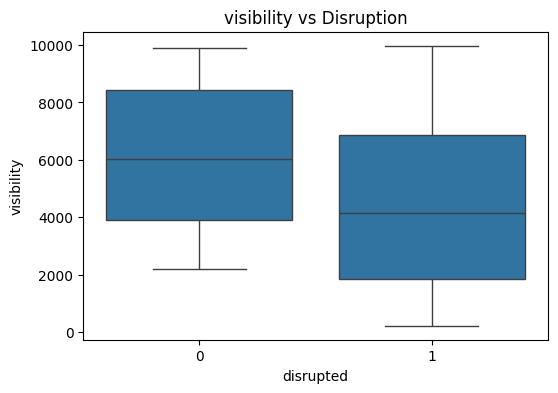

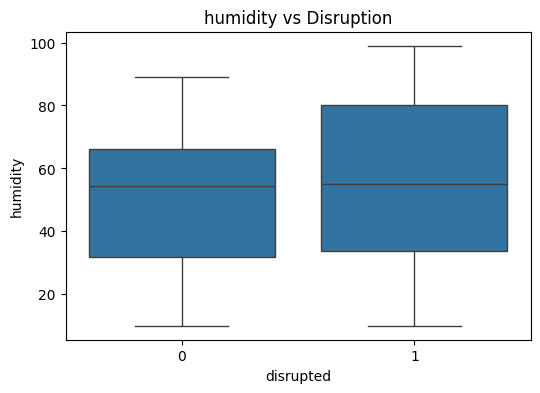

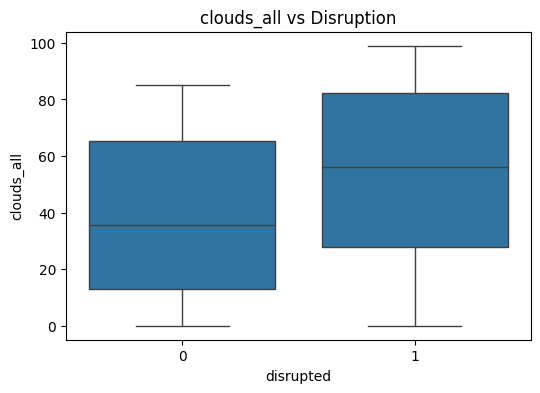

In [61]:
num_cols = ["wind_speed", "visibility", "humidity", "clouds_all"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df["disrupted"], y=df[col])
    plt.title(f"{col} vs Disruption")
    plt.show()


In [16]:
#removing outliers
def remove_outliers_iqr(df):
    df_no_outliers = df.copy()
    numeric_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
    
    for col in numeric_cols:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only values within the bounds
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers.reset_index(drop=True)

# Apply outlier removal
df_no_outliers = remove_outliers_iqr(df_encoded)

print("Before outlier removal:", df_encoded.shape)
print("After outlier removal:", df_no_outliers.shape)

Before outlier removal: (500, 34)
After outlier removal: (495, 34)


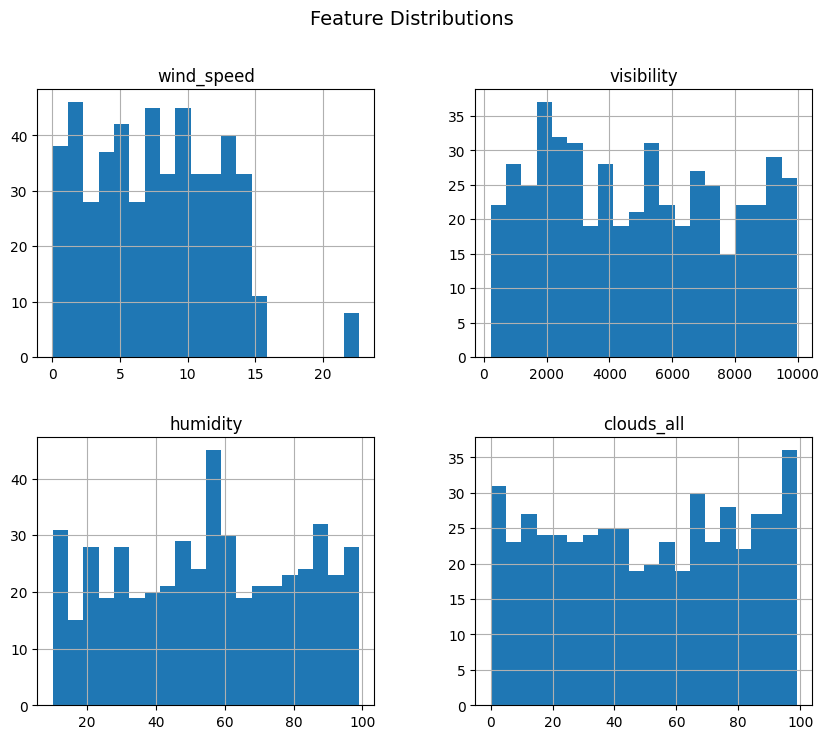

In [63]:
df[num_cols].hist(bins=20, figsize=(10,8))
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()


In [17]:
#scalling
numeric_cols = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns

In [18]:
scaler = StandardScaler()
df_no_outliers[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])


In [19]:
df_scaled = df_no_outliers.copy()

print("Scaled dataset shape:", df_scaled.shape)
print(df_scaled.head(5))

Scaled dataset shape: (495, 34)
         dt      temp  feels_like  pressure  humidity  temp_min  temp_max  \
0 -1.730335  0.305998    1.174875 -1.120774 -1.647571 -0.388806 -1.151050   
1 -1.723420  0.617813    1.419635  0.340670  0.416318 -0.994961 -0.914402   
2 -1.716505  1.041641    0.344952 -1.450777 -0.089919 -0.582062 -0.734909   
3 -1.709590  1.330012   -0.937552 -0.790770 -1.569688 -0.802975  0.696676   
4 -1.702675  0.907062   -1.090453 -1.120774  0.377377 -1.705122  1.690928   

   wind_speed  wind_deg  clouds_all  ...  weather_description_snowfall  \
0    0.442173 -0.464358    0.510035  ...                         False   
1    3.154664 -0.109255   -0.874613  ...                         False   
2    1.472710  1.243976   -1.435066  ...                         False   
3    0.075663  0.495380   -1.171323  ...                         False   
4   -1.217587 -0.243618   -1.632873  ...                         False   

   weather_description_thunderstorm  day_of_week_Funday  day

In [20]:
#handling duplicate values
duplicates_count = df_scaled.duplicated().sum()
duplicates_count

np.int64(0)

In [21]:
df_final = df_scaled.drop_duplicates().reset_index(drop=True)

In [22]:

print("Shape before:", df_scaled.shape)
print("Shape after removing duplicates:", df_final.shape)

Shape before: (495, 34)
Shape after removing duplicates: (495, 34)


In [23]:
#train test split
from sklearn.model_selection import train_test_split

In [24]:
#creating target column
severe_weather = df["weather_main"].astype(str).str.lower().isin(
    ["thunderstorm", "snow", "rain", "storm", "squall"]
)

high_wind = df["wind_speed"].fillna(0) > 12      # wind speed > 12 m/s
low_vis = df["visibility"].fillna(1e9) < 2000    # visibility < 2 km
high_cloud = df["clouds_all"].fillna(0) > 85     # heavy clouds
high_hum = df["humidity"].fillna(0) > 90         # very humid

df["disrupted"] = (severe_weather | high_wind | low_vis | high_cloud | high_hum).astype(int)

print(df[["weather_main", "wind_speed", "visibility", "clouds_all", "humidity", "disrupted"]].head(5))
print(df["disrupted"].value_counts(normalize=True))

   weather_main  wind_speed  visibility  clouds_all  humidity  disrupted
0  Thunderstorm    9.803036        7291          66      13.0          1
1       Drizzle   22.643187         233          24      66.0          1
2       Drizzle   14.681301        7270           7      53.0          1
3        Clouds    8.068081        6953          15      15.0          0
4       Drizzle    1.946211        6825           1      65.0          0
disrupted
1    0.752
0    0.248
Name: proportion, dtype: float64


In [25]:
X = df.drop(columns=["disrupted"])
y=df["disrupted"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [29]:
#one hot encoding
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

In [30]:
X_train_enc = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)

In [31]:
X_test_enc = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
#logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_enc, y_train)
y_pred_log = log_reg.predict(X_test_enc)


In [33]:
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_log))

🔹 Logistic Regression
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.72      1.00      0.84        72

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100

Confusion matrix:
 [[ 0 28]
 [ 0 72]]


c:\Users\rasgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rasgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rasgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [34]:
#random forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_enc, y_train)
y_pred_rf = rf.predict(X_test_enc)


In [35]:
print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))


🔹 Random Forest
Accuracy: 0.86
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        28
           1       0.84      1.00      0.91        72

    accuracy                           0.86       100
   macro avg       0.92      0.75      0.79       100
weighted avg       0.88      0.86      0.84       100

Confusion matrix:
 [[14 14]
 [ 0 72]]


In [37]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_clf.fit(X_train_enc, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
y_pred_dt = dt_clf.predict(X_test_enc)

In [ ]:
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

🔹 Decision Tree
Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.99      0.99        72

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:
 [[28  0]
 [ 1 71]]


In [38]:
#knn
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_enc, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
y_pred_knn = knn_clf.predict(X_test_enc)

In [46]:
print("KNN")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN
Accuracy: 0.61
Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.04      0.05        28
           1       0.69      0.83      0.75        72

    accuracy                           0.61       100
   macro avg       0.38      0.43      0.40       100
weighted avg       0.52      0.61      0.56       100

Confusion Matrix:
 [[ 1 27]
 [12 60]]


In [39]:
#svc
from sklearn.svm import SVC

In [47]:
svm_clf = SVC(kernel="rbf", probability=True, random_state=42)
svm_clf.fit(X_train_enc, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [48]:
y_pred_svm = svm_clf.predict(X_test_enc)

In [49]:
print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.72      1.00      0.84        72

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100

Confusion Matrix:
 [[ 0 28]
 [ 0 72]]


c:\Users\rasgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rasgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rasgu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
results = []
results.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log, zero_division=0),
    "Recall": recall_score(y_test, y_pred_log, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_log, zero_division=0)
})

In [52]:
results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, zero_division=0),
    "Recall": recall_score(y_test, y_pred_rf, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_rf, zero_division=0)
})

In [53]:
results.append({
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, zero_division=0),
    "Recall": recall_score(y_test, y_pred_dt, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_dt, zero_division=0)
})

In [54]:
results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, zero_division=0),
    "Recall": recall_score(y_test, y_pred_knn, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_knn, zero_division=0)
})

In [55]:
results.append({
    "Model": "SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, zero_division=0),
    "Recall": recall_score(y_test, y_pred_svm, zero_division=0),
    "F1-Score": f1_score(y_test, y_pred_svm, zero_division=0)
})

In [56]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1-Score", ascending=False))

                 Model  Accuracy  Precision    Recall  F1-Score
2        Decision Tree      0.99   1.000000  0.986111  0.993007
1        Random Forest      0.86   0.837209  1.000000  0.911392
0  Logistic Regression      0.72   0.720000  1.000000  0.837209
4                  SVM      0.72   0.720000  1.000000  0.837209
3                  KNN      0.61   0.689655  0.833333  0.754717


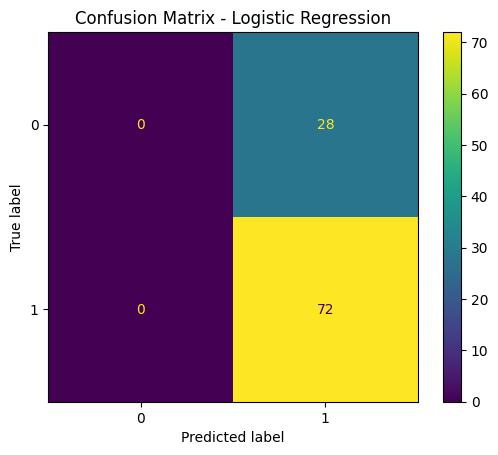

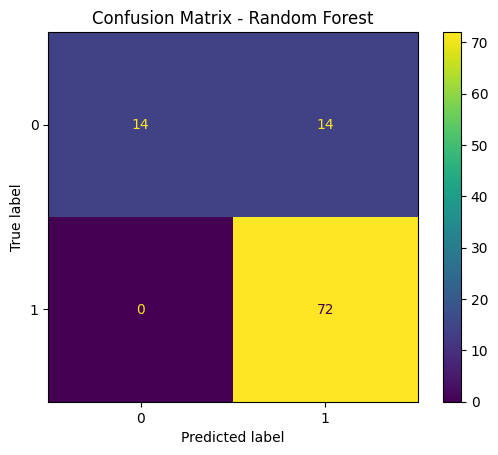

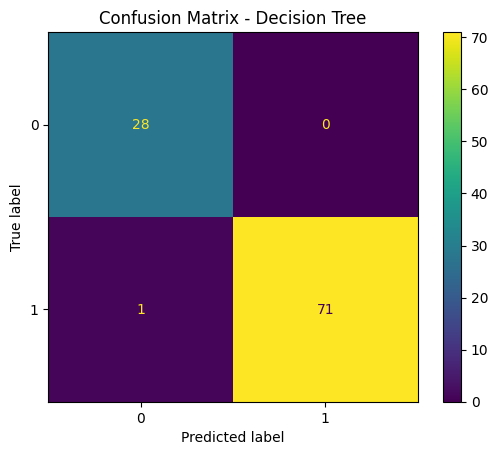

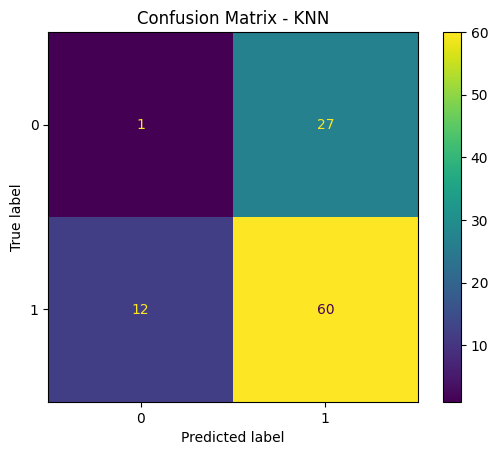

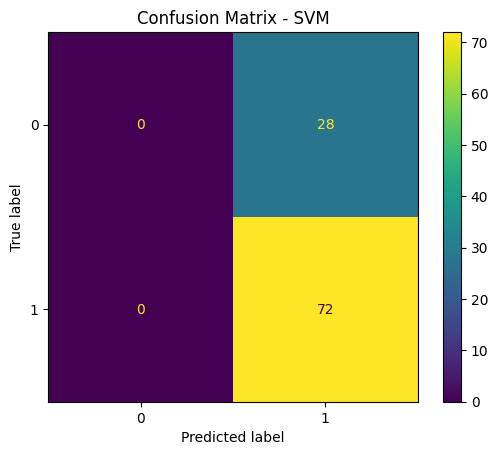

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

models_preds = {
    "Logistic Regression": y_pred_log,
    "Random Forest": y_pred_rf,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn,
    "SVM": y_pred_svm
}

for name, preds in models_preds.items():
    ConfusionMatrixDisplay.from_predictions(y_test, preds)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


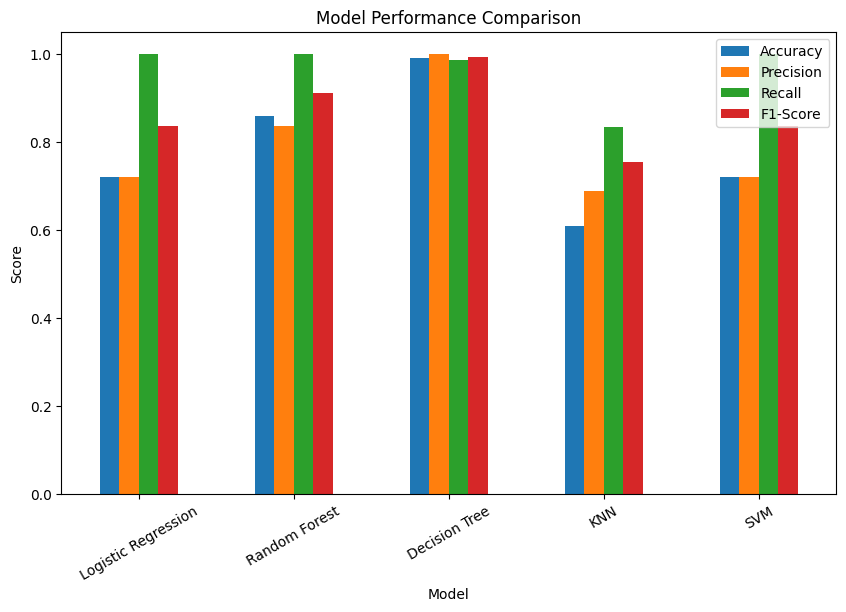

In [65]:
results_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score"]].plot(
    kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.show()


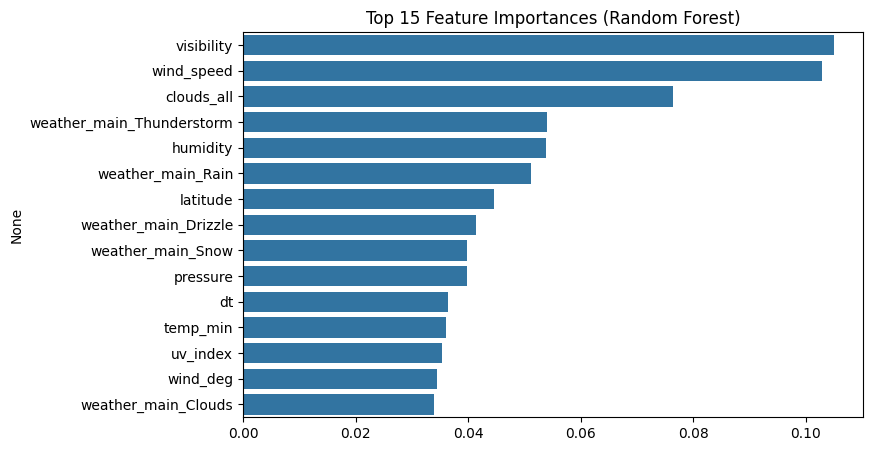

In [66]:
importances = rf.feature_importances_
feat_names = X_train_enc.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()
